In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
from PIL import Image 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import scipy.linalg as la 
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it

In [7]:
 readingCsv=pd.read_excel(r"C:\Users\Hp\Downloads\Election_Data (4).xlsx",sheet_name='Election_Dataset_Two Classes'
)
print(readingCsv)
readingCsv.head()

              vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
0         4      1       2   

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [3]:
readingCsv.describe()
readingCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [4]:
readingCsv.shape
readingCsv.head()
readingCsv.gender[readingCsv.gender == 'male'] = 1
readingCsv.gender[readingCsv.gender == 'female'] = 2


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
readingCsv['vote'].value_counts()


Labour          1063
Conservative     462
Name: vote, dtype: int64

In [6]:
readingCsv.vote[readingCsv.vote == 'Labour'] = 1
readingCsv.vote[readingCsv.vote == 'Conservative'] = 2


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
readingCsv.isnull().sum()[readingCsv.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
#readingCsv.isnull().sum()
for column in readingCsv.columns:
    if readingCsv[column].dtype != 'object':
        mean = readingCsv[column].mean()
        readingCsv[column] = readingCsv[column].fillna(mean)    
        
readingCsv.isnull().sum() 
readingCsv.gender[readingCsv.gender == 'male'] = 1
readingCsv.gender[readingCsv.gender == 'female'] = 2



C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers

In [8]:
dups = readingCsv.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

readingCsv[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
readingCsv.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


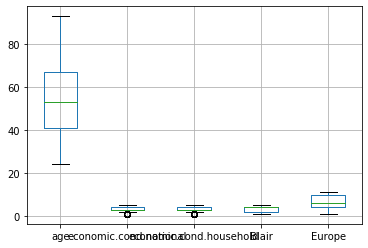

In [11]:
readingCsv.boxplot(column=["age","economic.cond.national", "economic.cond.household","Blair","Europe"])
plt.show()
#readingCsv_backup.boxplot(column=["age",economic.cond.national","economic.cond.household","Blair"","Europe"])
plt.show()

#sns.boxplot(data = pd.melt(readingCsv))
#plt.show()

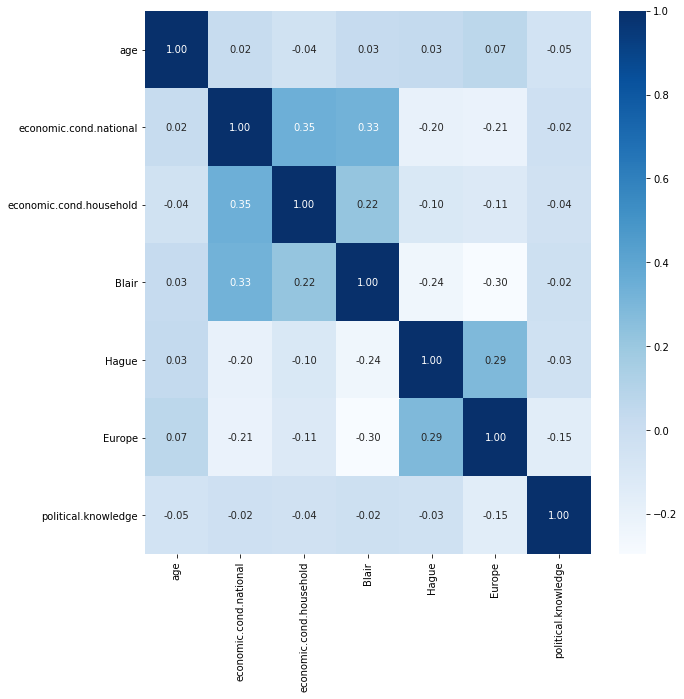

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(readingCsv.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()


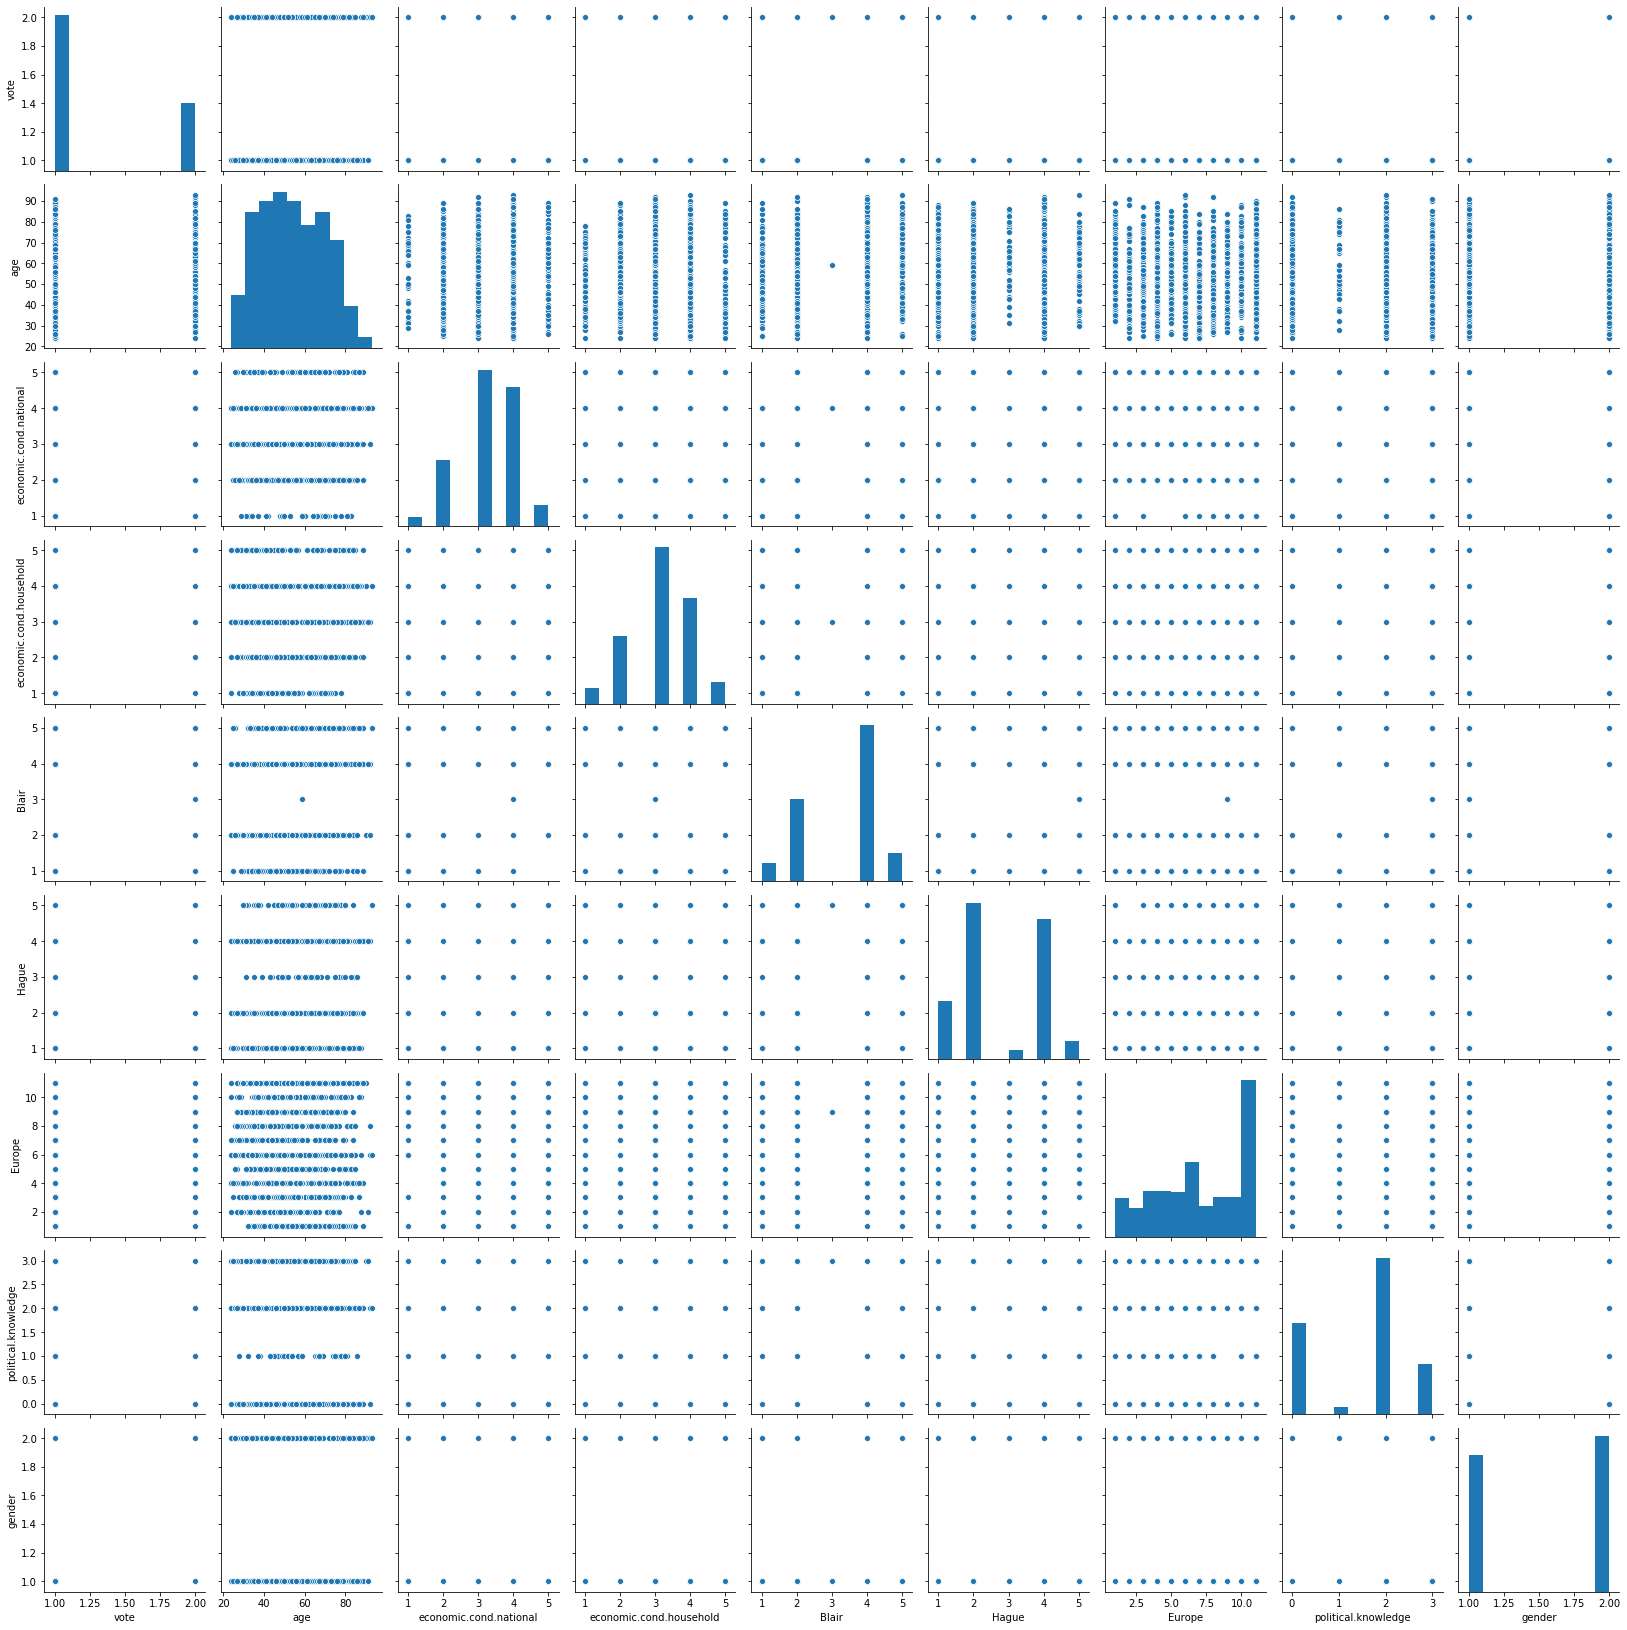

In [13]:
sns.pairplot(readingCsv)

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [9]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
#readingCsv['age']  =readingCsv['age'].astype('category')
#readingCsv['age_Cat']  =readingCsv['age'].cat.codes
readingCsv['vote']  =readingCsv['vote'].astype('category')
readingCsv['vote_cat']  =readingCsv['vote'].cat.codes
readingCsv['gender']  =readingCsv['gender'].astype('category')
readingCsv['gender_cat']  =readingCsv['gender'].cat.codes
readingCsv['economic.cond.national']  =readingCsv['economic.cond.national'].astype('category')
readingCsv['economic.cond.national_cat']  =readingCsv['economic.cond.national'].cat.codes
readingCsv['economic.cond.household']  =readingCsv['economic.cond.household'].astype('category')
readingCsv['economic.cond.household_cat']  =readingCsv['economic.cond.household'].cat.codes
readingCsv.dtypes

readingCsv['age'] = std_scale.fit_transform(readingCsv[['age']])
readingCsv['economic.cond.national']= std_scale.fit_transform(readingCsv[['economic.cond.national']])   
readingCsv['economic.cond.household']= std_scale.fit_transform(readingCsv[['economic.cond.household']])
readingCsv['Blair']= std_scale.fit_transform(readingCsv[['Blair']])  
readingCsv['Europe']= std_scale.fit_transform(readingCsv[['Europe']])   
readingCsv.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_cat,gender_cat,economic.cond.national_cat,economic.cond.household_cat
0,Labour,-0.711973,-0.279218,-0.150948,0.566716,1,-1.434426,2,female,1,0,2,2
1,Labour,-1.157661,0.856268,0.924730,0.566716,4,-0.524358,2,male,1,1,3,3
2,Labour,-1.221331,0.856268,0.924730,1.418187,2,-1.131070,2,male,1,1,3,3
3,Labour,-1.921698,0.856268,-1.226625,-1.136225,1,-0.827714,0,female,1,0,3,1
4,Labour,-0.839313,-1.414704,-1.226625,-1.987695,1,-0.221002,2,male,1,1,1,1


In [11]:
# min and max value
print(readingCsv['age'].min())
print(readingCsv['age'].max())

-1.921697853364426
2.4715118585559646


In [12]:
readingCsv.describe()


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_cat,gender_cat,economic.cond.national_cat,economic.cond.household_cat
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1525.000000,1.525000e+03,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,1.260922e-16,2.545141e-16,-4.551550e-16,4.322954e-16,2.746885,-3.619691e-16,1.542295,0.697049,0.467541,2.245902,2.140328
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.230703,1.000328e+00,1.083315,0.459685,0.499109,0.880969,0.929951
min,-1.921698e+00,-2.550189e+00,-2.302303e+00,-1.987695e+00,1.000000,-1.737782e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.393129e-01,-2.792178e-01,-1.509476e-01,-1.136225e+00,2.000000,-8.277143e-01,0.000000,0.000000,0.000000,2.000000,2.000000
50%,-7.527638e-02,-2.792178e-01,-1.509476e-01,5.667164e-01,2.000000,-2.210023e-01,2.000000,1.000000,0.000000,2.000000,2.000000
75%,8.160995e-01,8.562679e-01,9.247302e-01,5.667164e-01,4.000000,9.924217e-01,2.000000,1.000000,1.000000,3.000000,3.000000
max,2.471512e+00,1.991754e+00,2.000408e+00,1.418187e+00,5.000000,1.295778e+00,3.000000,1.000000,1.000000,4.000000,4.000000


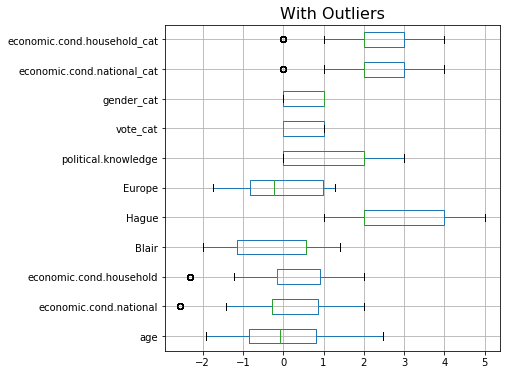

In [18]:
# construct box plot for continuous variables
cont=readingCsv.dtypes[(readingCsv.dtypes!='uint8') & (readingCsv.dtypes!='bool')].index
plt.figure(figsize=(6,6))
readingCsv[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

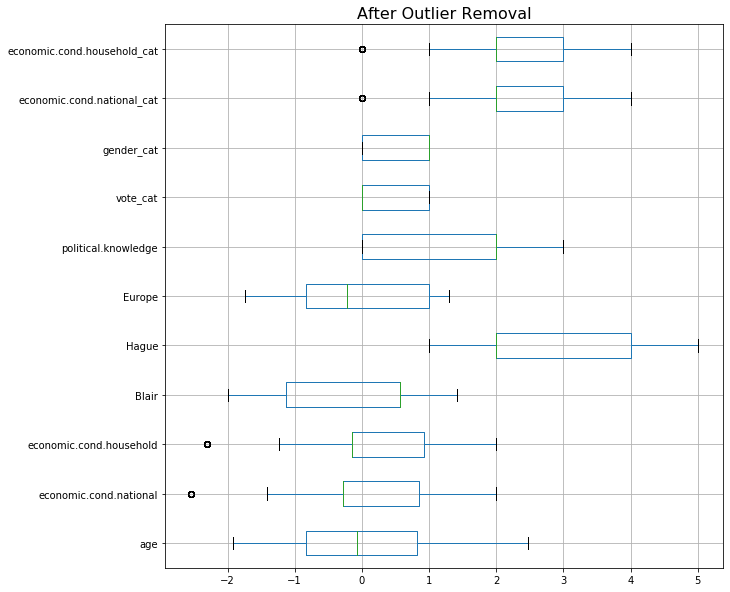

In [19]:
plt.figure(figsize=(10,10))
readingCsv[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

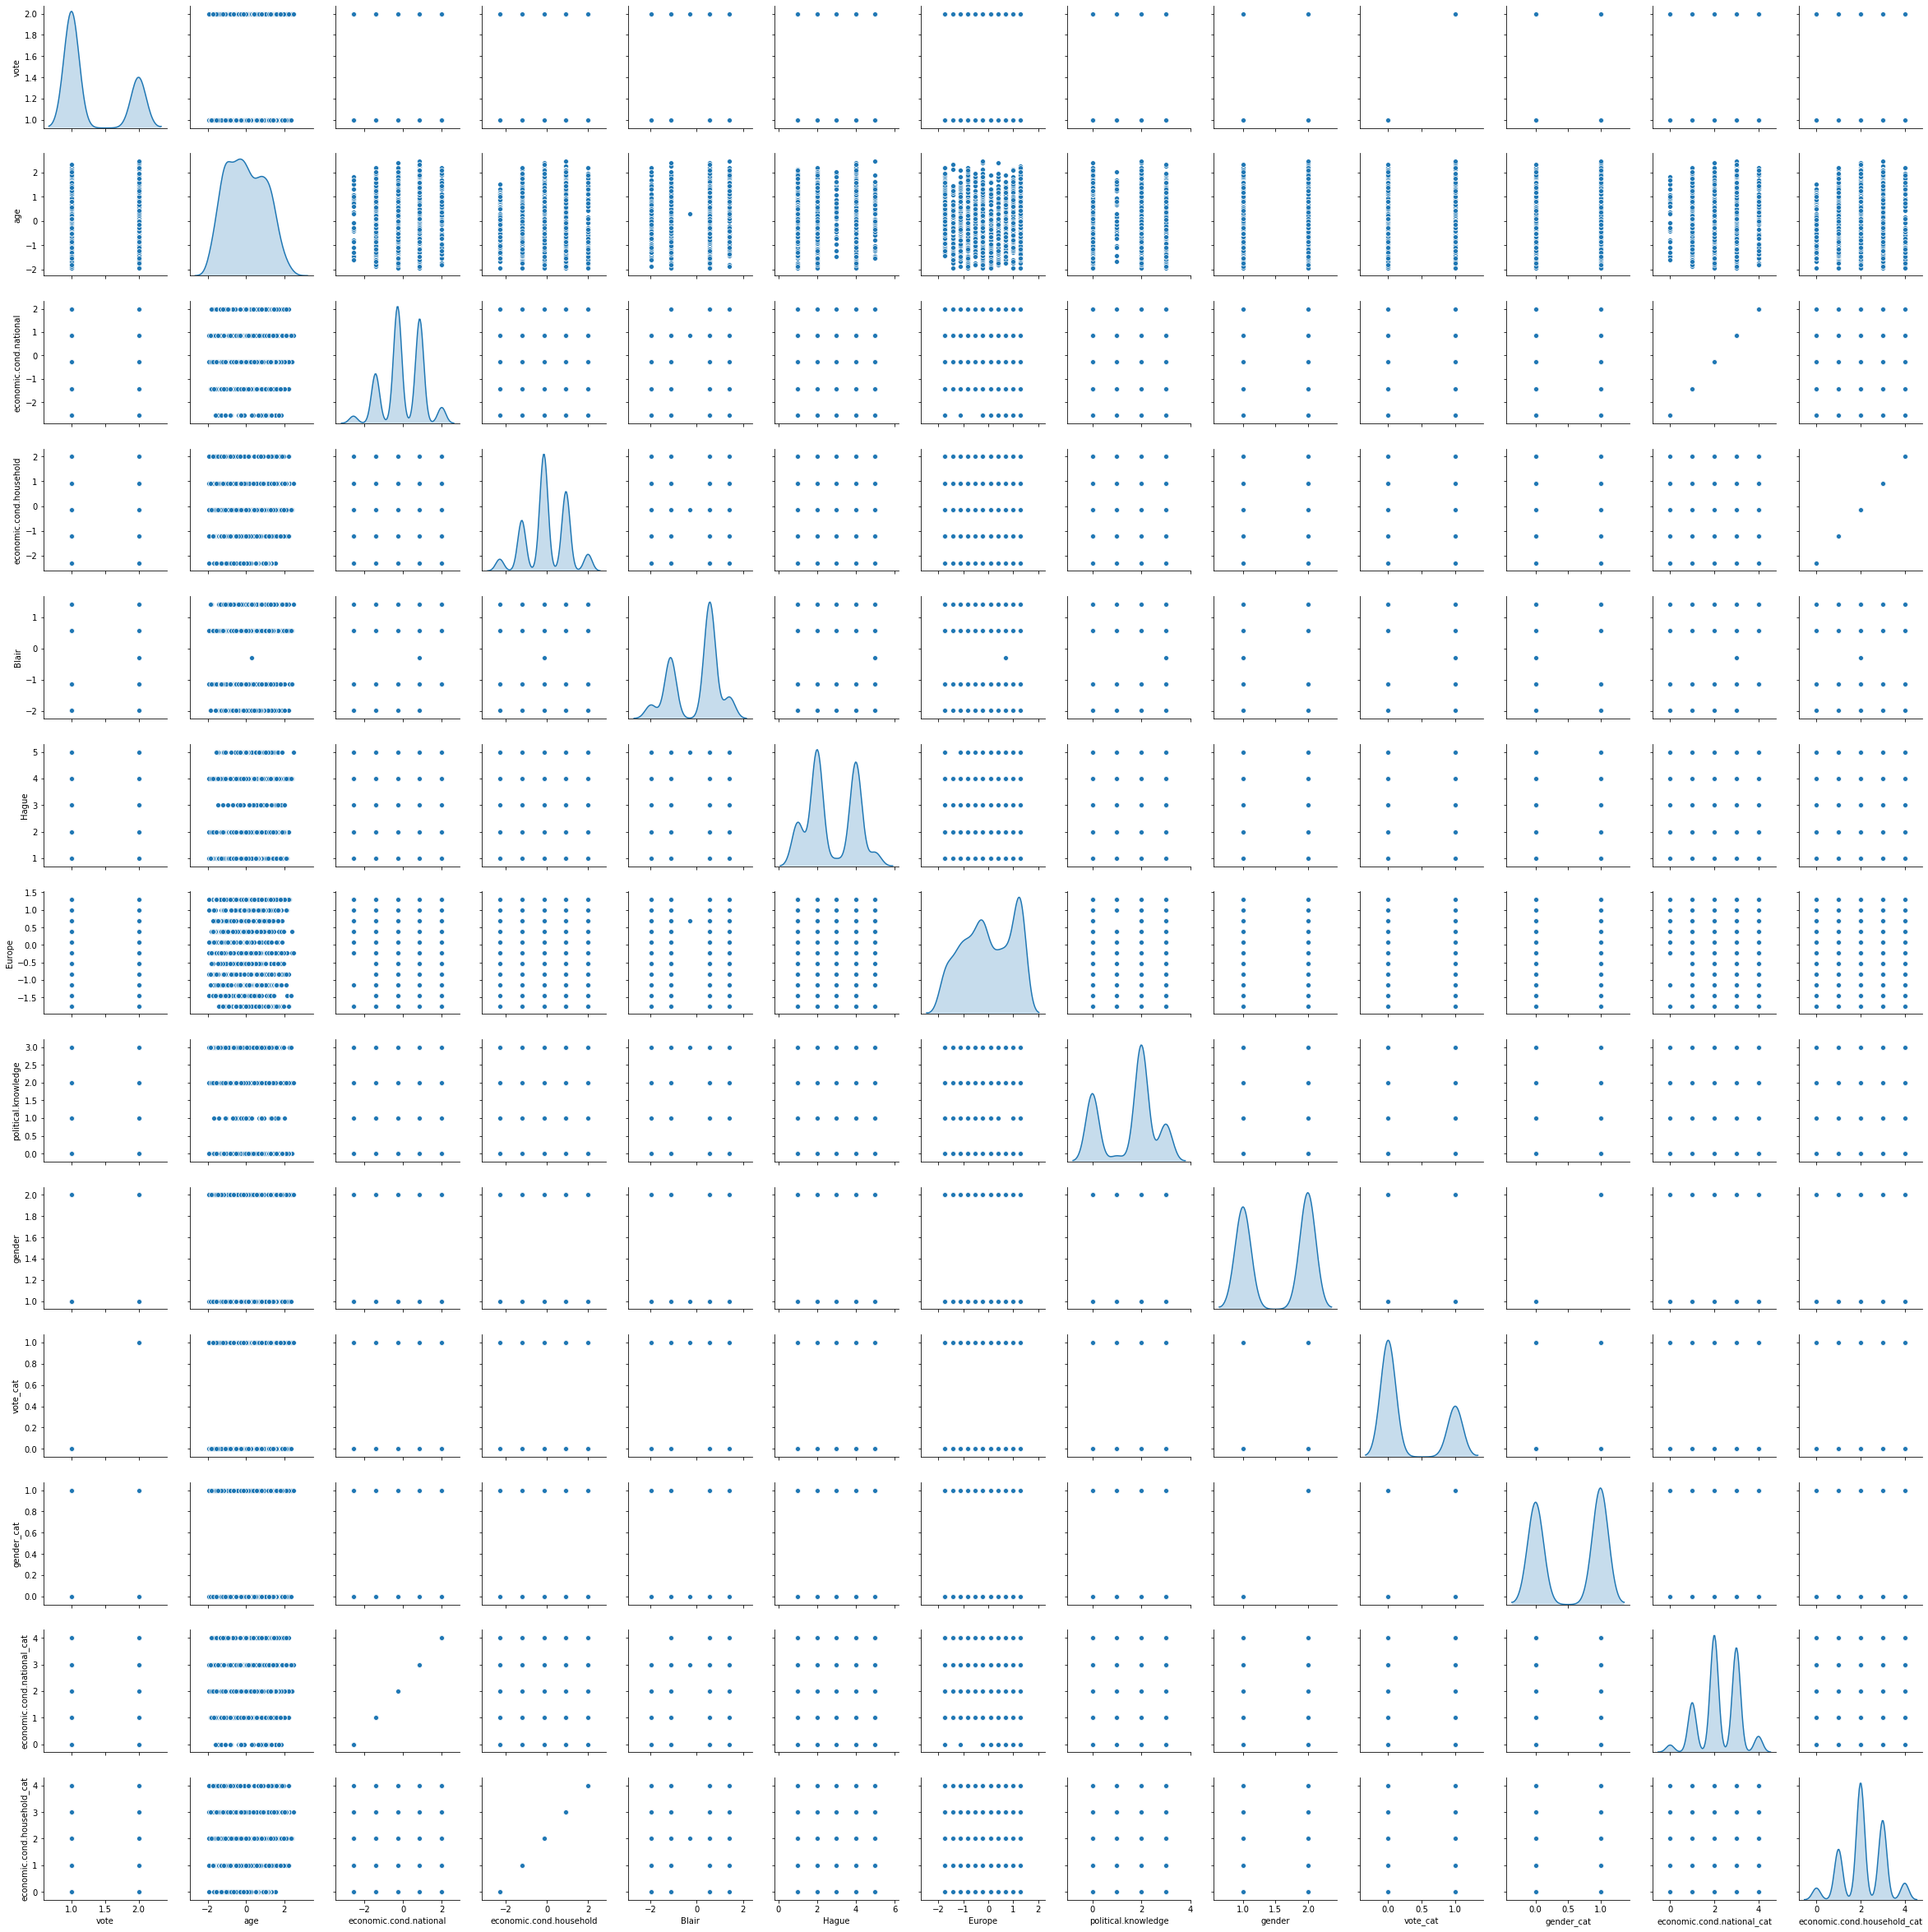

In [20]:
readingCsv_attr = (readingCsv[cont])
sns.pairplot(readingCsv_attr, diag_kind='kde')  
plt.show()


In [14]:
# Copy all the predictor variables into X dataframe
X = readingCsv.drop(['age','political.knowledge','economic.cond.national','economic.cond.household','Hague','gender'] , axis=1)
#X = X.drop(['gender_Stdscale'], axis=1, retain=True)
# Copy target into the y dataframe. 
y = readingCsv[['vote']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   vote                         1525 non-null   category
 1   Blair                        1525 non-null   float64 
 2   Europe                       1525 non-null   float64 
 3   vote_cat                     1525 non-null   int8    
 4   gender_cat                   1525 non-null   int8    
 5   economic.cond.national_cat   1525 non-null   int8    
 6   economic.cond.household_cat  1525 non-null   int8    
dtypes: category(1), float64(2), int8(4)
memory usage: 31.5 KB


In [15]:
X.head()

,vote,Blair,Europe,vote_cat,gender_cat,economic.cond.national_cat,economic.cond.household_cat
0,Labour,0.566716,-1.434426,1,0,2,2
1,Labour,0.566716,-0.524358,1,1,3,3
2,Labour,1.418187,-1.131070,1,1,3,3
3,Labour,-1.136225,-0.827714,1,0,3,1
4,Labour,-1.987695,-0.221002,1,1,1,1


In [19]:
X['economic.cond.national_cat'] = round(X['economic.cond.national_cat'],5)
X['economic.cond.household_cat'] = round(X['economic.cond.household_cat'],5)
X['Blair'] = round(X['Blair'],5)
X['Europe'] = round(X['Europe'],5)
y['vote'] = round(y['vote'],5)
#readingCsv.isnull().sum()[readingCsv.isnull().sum()=='age_Cat','economic.cond.national_cat','economic.con.househols_cat']


TypeError: can't multiply sequence by non-int of type 'float'

In [16]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [18]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Labour'

In [26]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for vote is 0.4999999999999999
The coefficient for Blair is 1.6852464723753444e-15
The coefficient for Europe is -2.3528908500882365e-16
The coefficient for vote_cat is 0.4999999999999999
The coefficient for gender_cat is 2.533970549179871e-17
The coefficient for economic.cond.national_cat is -5.8266008840570835e-15
The coefficient for economic.cond.household_cat is 3.703405934234919e-15


# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

In [27]:
#array = readingCsv.values
#X = array[['age','Blair','Europe','age_cat','economic.cond.national_cat','economic.cond.household_cat']] # select all rows and first 8 columns which are the attributes
#X = pd.DataFrame(columns=['age','Blair','Europe','age_cat','economic.cond.national_cat','economic.cond.household_cat'],data=readingCsv) # select all rows and first 8 columns which are the attributes
#Y = array[:,2]   # select all rows and the 8th column which is the classification "Yes", "No" for Election Data

test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=15)
type(X_train)

pandas.core.frame.DataFrame

# Logistic Regression


In [28]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
[[317   0]
 [  0 141]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       317
           2       1.00      1.00      1.00       141

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



# LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(X_train, y_train)
y_pred=clfLDA.predict(X_test)
model_scoreLDA = clfLDA.score(X_test, y_test)
print(model_scoreLDA)
print(metrics.confusion_matrix(y_test, y_pred))

0.7816593886462883
[[287  30]
 [ 70  71]]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

# KNN Model

In [30]:
readingCsv['vote'] = readingCsv.vote.astype('category')


In [41]:
readingCsv.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,1525.0,1.260922e-16,1.000328,-1.921698,-0.839313,-0.075276,0.816100,2.471512
economic.cond.national,1525.0,2.545141e-16,1.000328,-2.550189,-0.279218,-0.279218,0.856268,1.991754
economic.cond.household,1525.0,-4.551550e-16,1.000328,-2.302303,-0.150948,-0.150948,0.924730,2.000408
Blair,1525.0,4.322954e-16,1.000328,-1.987695,-1.136225,0.566716,0.566716,1.418187
Hague,1525.0,2.746885e+00,1.230703,1.000000,2.000000,2.000000,4.000000,5.000000
Europe,1525.0,-3.619691e-16,1.000328,-1.737782,-0.827714,-0.221002,0.992422,1.295778
political.knowledge,1525.0,1.542295e+00,1.083315,0.000000,0.000000,2.000000,2.000000,3.000000
vote_cat,1525.0,3.029508e-01,0.459685,0.000000,0.000000,0.000000,1.000000,1.000000
gender_cat,1525.0,5.324590e-01,0.499109,0.000000,0.000000,1.000000,1.000000,1.000000
economic.cond.national_cat,1525.0,2.245902e+00,0.880969,0.000000,2.000000,2.000000,3.000000,4.000000


In [42]:
readingCsv.groupby(["gender"]).count()
# Class distribution among 1 and 1 is almost 2:1. The model will better predict 1 and 2

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_cat,gender_cat,economic.cond.national_cat,economic.cond.household_cat
gender,,,,,,,,,,,,
1,713,713,713,713,713,713,713,713,713,713,713,713
2,812,812,812,812,812,812,812,812,812,812,812,812


In [43]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = readingCsv.drop(labels= "vote_cat" , axis = 1)
y = readingCsv["vote_cat"]
X.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,gender_cat,economic.cond.national_cat,economic.cond.household_cat
0,1,-0.711973,-0.279218,-0.150948,0.566716,1,-1.434426,2,2,1,2,2
1,1,-1.157661,0.856268,0.924730,0.566716,4,-0.524358,2,1,0,3,3
2,1,-1.221331,0.856268,0.924730,1.418187,2,-1.131070,2,1,0,3,3
3,1,-1.921698,0.856268,-1.226625,-1.136225,1,-0.827714,0,2,1,3,1
4,1,-0.839313,-1.414704,-1.226625,-1.987695,1,-0.221002,2,1,0,1,1


In [66]:
X.shape

(1525, 12)

In [45]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,gender_cat,economic.cond.national_cat,economic.cond.household_cat
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,5.288302e-16,2.897500e-17,2.702392e-16,-4.937762e-16,4.775779e-17,-1.560864e-16,-2.580086e-16,-6.921968e-16,1.948896e-16,1.948896e-16,2.545141e-16,-4.551550e-16
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-6.592564e-01,-1.921698e+00,-2.550189e+00,-2.302303e+00,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00,-1.067169e+00,-1.067169e+00,-2.550189e+00,-2.302303e+00
25%,-6.592564e-01,-8.393129e-01,-2.792178e-01,-1.509476e-01,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00,-1.067169e+00,-1.067169e+00,-2.792178e-01,-1.509476e-01
50%,-6.592564e-01,-7.527638e-02,-2.792178e-01,-1.509476e-01,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01,9.370586e-01,9.370586e-01,-2.792178e-01,-1.509476e-01
75%,1.516861e+00,8.160995e-01,8.562679e-01,9.247302e-01,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01,9.370586e-01,9.370586e-01,8.562679e-01,9.247302e-01
max,1.516861e+00,2.471512e+00,1.991754e+00,2.000408e+00,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00,9.370586e-01,9.370586e-01,1.991754e+00,2.000408e+00


In [36]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [37]:
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )


In [46]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

# Evaluate Performance of kNN Model

In [68]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.09170305676855896

In [3]:
 #calculate accuracy measures and confusion matrix
from sklearn import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["vote", "gender"])
readingCsv_cm = pd.readingCsv_cm(cm, index = [i for i in ["vote","gender"]],
                  columns = [i for i in ["Predict vote","Predict gender"]])
plt.figure(figsize = (7,5))
sns.heatmap(readingCsv_cm, annot=True)

Confusion Matrix


NameError: name 'y_test' is not defined

In [69]:
from sklearn.model_selection import train_test_split

X = readingCsv.drop('vote',axis=1)     # Predictor feature columns (8 X m)

Y = readingCsv['vote']   # Predicted class (1=True, 0=False) (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_cat,gender_cat,economic.cond.national_cat,economic.cond.household_cat
1453,0.497751,-0.279218,-0.150948,-1.136225,2,1.295778,2,2,0,1,2,2
275,-0.329955,-0.279218,-0.150948,-1.136225,2,0.385710,0,2,1,1,2,2
1130,1.261787,0.856268,0.924730,0.566716,4,0.082354,0,1,0,0,3,3
1153,0.179402,-1.414704,-0.150948,0.566716,2,-0.221002,2,2,0,1,1,2
1172,-1.921698,0.856268,2.000408,0.566716,4,-0.221002,0,1,1,0,3,4


In [50]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(readingCsv.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(readingCsv.index)) * 100))

69.97% data is in training set
30.03% data is in test set


In [51]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_cat,gender_cat,economic.cond.national_cat,economic.cond.household_cat
1453,0.497751,-0.279218,-0.150948,-1.136225,2,1.295778,2,2,0,1,2,2
275,-0.329955,-0.279218,-0.150948,-1.136225,2,0.385710,0,2,1,1,2,2
1130,1.261787,0.856268,0.924730,0.566716,4,0.082354,0,1,0,0,3,3
1153,0.179402,-1.414704,-0.150948,0.566716,2,-0.221002,2,2,0,1,1,2
1172,-1.921698,0.856268,2.000408,0.566716,4,-0.221002,0,1,1,0,3,4


# Train Naive Bayes algorithm¶


In [52]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

# Performance of our model with training data

In [70]:
diab_train_predict = diab_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 1.0000



# Performance of our model with testing data¶


In [54]:
diab_test_predict = diab_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 1.0000



# Lets check the confusion matrix and classification report¶


Confusion Matrix


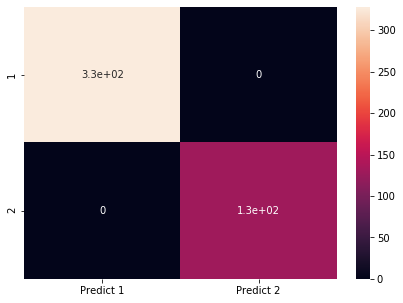

In [80]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 2])

readingCsv_cm = pd.DataFrame(cm, index = [i for i in ["1","2"]],
                  columns = [i for i in ["Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(readingCsv_cm, annot=True)

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [58]:
y_predict = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))

1.0
[[735   0]
 [  0 332]]


In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,y_train)

y_pred=clfRF.predict(X_test)
model_scoreRF = clfRF.score(X_test, y_test)

In [71]:
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

1.0
[[328   0]
 [  0 130]]


In [61]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [62]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

1.0
[[328   0]
 [  0 130]]


# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [1]:
#Testing with test data
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, model.predict(X_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model.predict(X_test)))

NameError: name 'y_train' is not defined